# **Kaggle: Mushroom Classification**


Soy Joel Sánchez de Murga Pacheco con NIU 1598948 y este es mi notebook sobre **Mushroom Classification**.

Con url al Kaggle: https://www.kaggle.com/datasets/uciml/mushroom-classification

Esta base de datos contiene información sobre los champiñones, como es su forma, de que tamaño són, ... Todo para poder saber si ese champiñon es venenoso o comestible. 

Entonces nuestra intención con este notebook es poder crear modelos para classificar cada champiñon y poder saber si son comestibles. Dado el problema que nos han dado, necesitamos crear classificadores con un alto porcentaje de *accuracy*, ya que no queremos que nadie ingiera un champiñon venenoso.

Esta base de datos contiene 22 atributos, donde el primer atributo indica si es venenoso o si es comestible el champiñon. El resto de atributos indican sus cualidades como por ejemplo, *gill-size* indica el tamaño del cuerpo, *cap-shape* indica la forma de la cabeza del champiñon,...

Todos los atributos son categoricos, es decir, no hay ningun valor numerico. 

## Data Mining

Primero cargamos los datos

In [1]:
import numpy as np
import math
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset
data = load_dataset('data/mushrooms.csv')

print("Dataset len: ", len(data))
print("Dataset shape: ", data.shape)
data.head()

Dataset len:  8124
Dataset shape:  (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Comprobamos si contiene datos nulos

In [2]:
print("Valores NaN: ", data.isnull().sum())

Valores NaN:  class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


No tiene ningun valor nulo y procedemos a mostrar la descripción del dataset

In [3]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Se puede observar que la columna *veil-type* solo tiene un valor único, es decir que esta columna no nos proporciona información. Eliminamos esta columna.

In [4]:
data = data.drop(['veil-type'], axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Transformamos los datos categoricos a datos numericos para una mejor representación y classificación.

In [6]:
'''
data2 = data.copy()

for col in data2:
    words = data2[col].unique()
    i = 0
    for word in words:
        data2[col] = data2[col].replace({word: i})
        i += 1

print(data2.info())
'''
#La manera anterior es como lo hacia al principio. Ahora he encontrado una libreria que lo hace más rápido
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])

print(data.head)

<bound method NDFrame.head of       class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0         

Visualizamos el HeatMap

<AxesSubplot:>

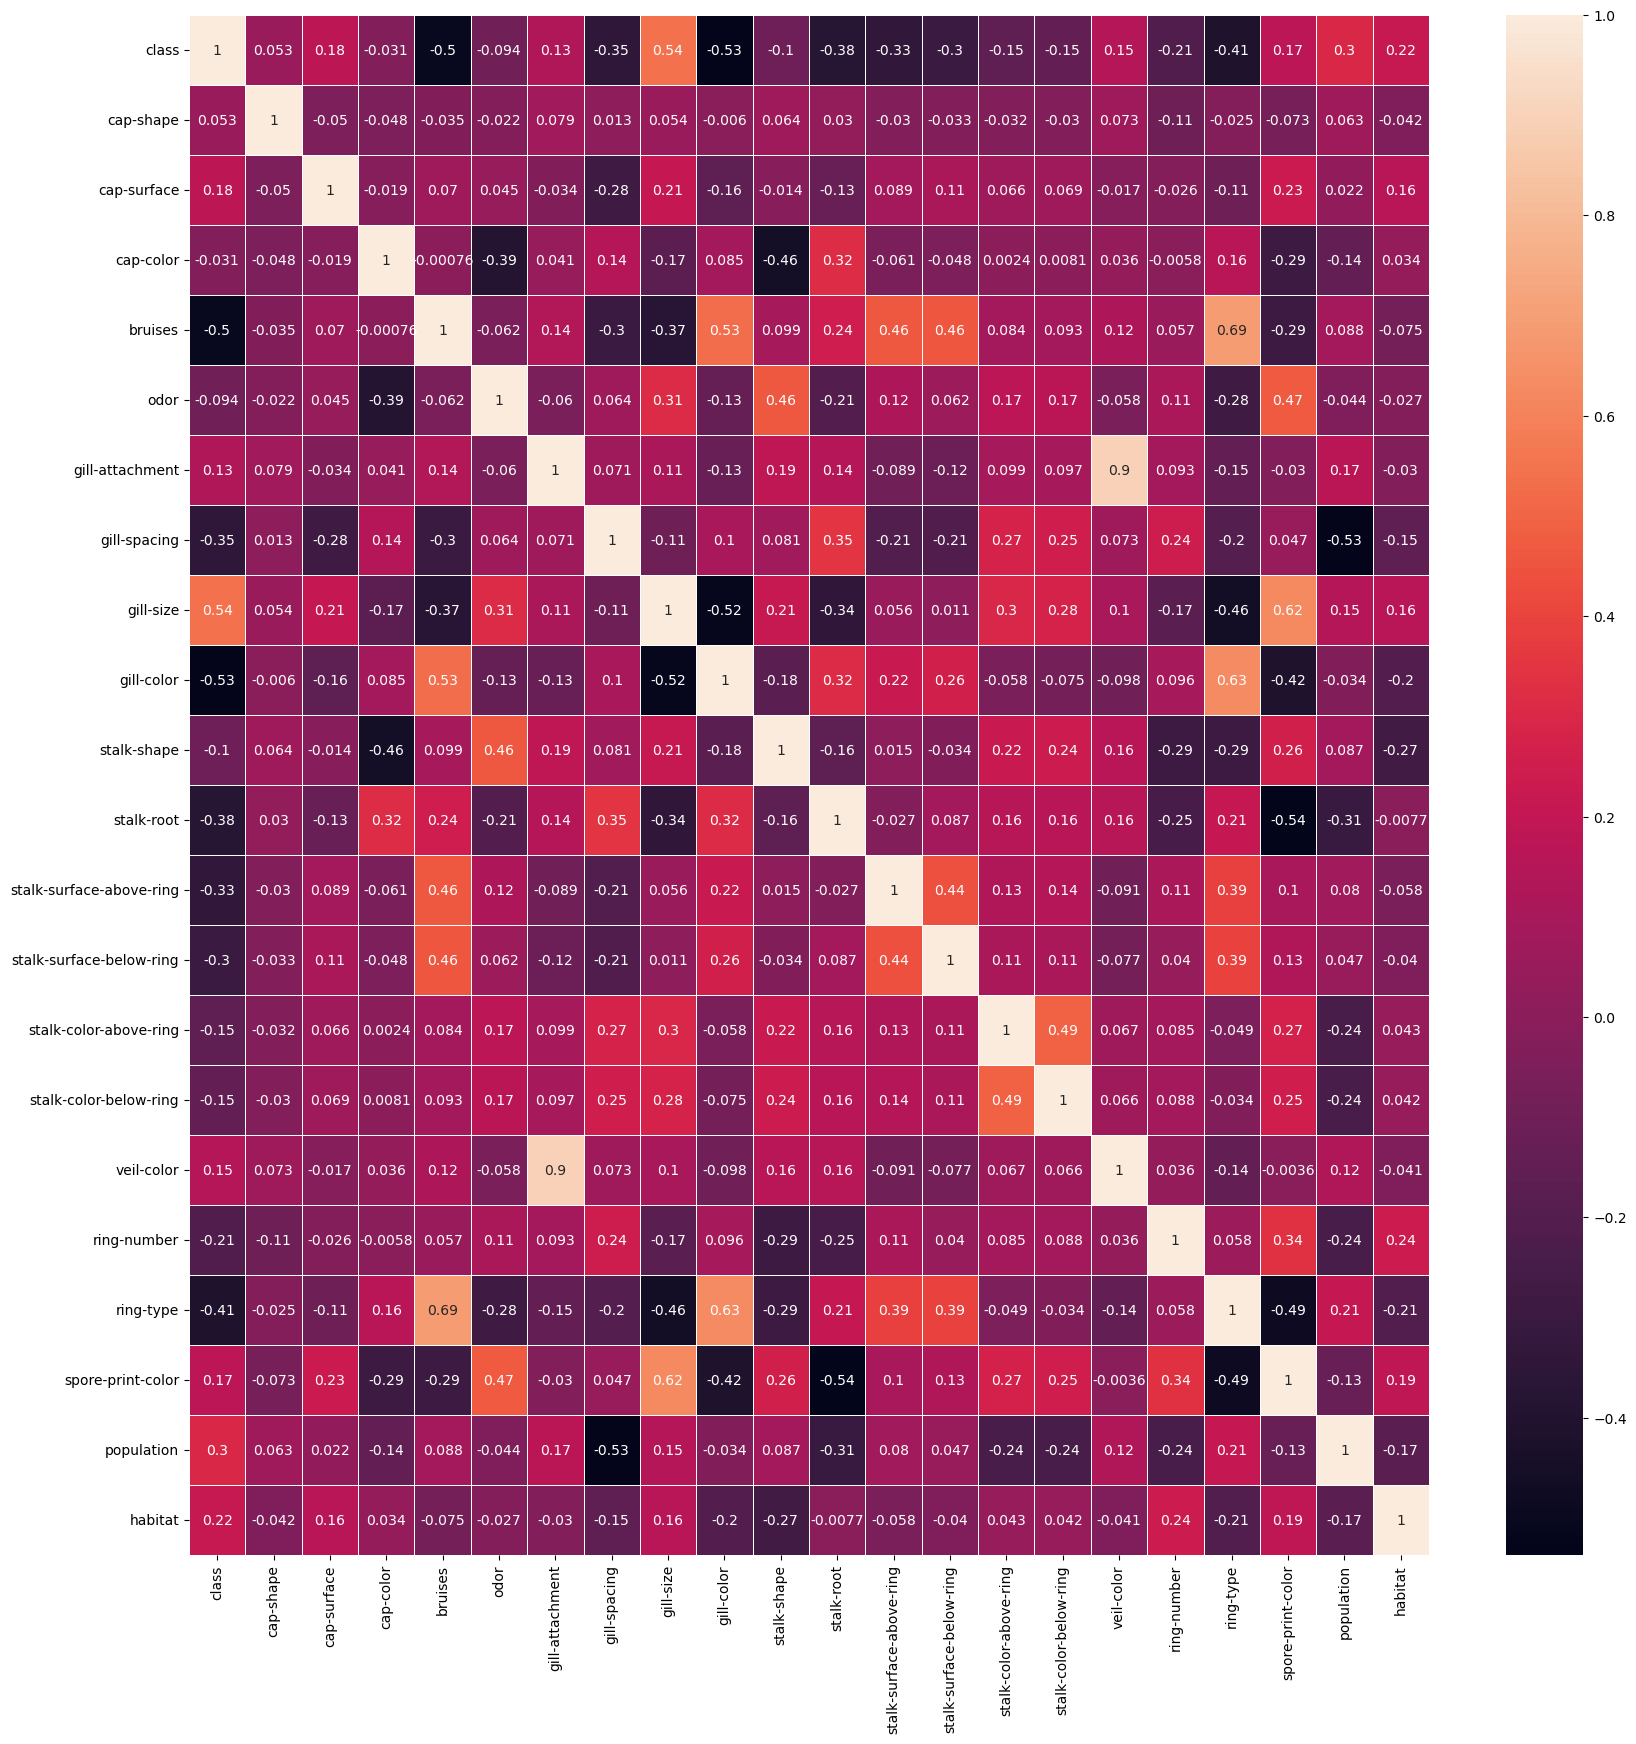

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

cor = data.corr()
plt.figure(figsize=[20, 20])
sns.heatmap(cor, annot=True, linewidth=.5)


Podemos observar como el atributo objetivo *class* tiene una correlacion más alta con:  
+0.3:  
- gill-size (+0.54)  
- population (+0.3)

<-0.3:  
- gill-color (-0.53)  
- bruises (-0.5)  
- ring-type (-0.41)  
- stalk-root (-0.38) 
- gill-spacing(-0.35)
- stalk-surface-above-ring (-0.33)  
- stalk-surface-below-ring (-0.3)  
    
Tambien se puede observar que no tiene nada de correlación con:  
Entre 0.2 i -0.2:  
- cap-shape  
- cap-surface  
- cap-color  
- odor
- gill-attachment  
- stalk-shape  
- stalk-color-above-ring  
- stalk-color-above-ring  
- veil-color  
- spore-print-color  
- habitat

Donde los 5 atributos con **más correlación** en valor absoluto son:  
- gill-size (0.54)  
- gill-color (0.53)  
- bruises (0.5)  
- ring-type (0.41)  
- stalk-root (0.38)
    

Mostramos los histogramas de cada atributo.

array([[<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'cap-shape'}>,
        <AxesSubplot:title={'center':'cap-surface'}>,
        <AxesSubplot:title={'center':'cap-color'}>,
        <AxesSubplot:title={'center':'bruises'}>],
       [<AxesSubplot:title={'center':'odor'}>,
        <AxesSubplot:title={'center':'gill-attachment'}>,
        <AxesSubplot:title={'center':'gill-spacing'}>,
        <AxesSubplot:title={'center':'gill-size'}>,
        <AxesSubplot:title={'center':'gill-color'}>],
       [<AxesSubplot:title={'center':'stalk-shape'}>,
        <AxesSubplot:title={'center':'stalk-root'}>,
        <AxesSubplot:title={'center':'stalk-surface-above-ring'}>,
        <AxesSubplot:title={'center':'stalk-surface-below-ring'}>,
        <AxesSubplot:title={'center':'stalk-color-above-ring'}>],
       [<AxesSubplot:title={'center':'stalk-color-below-ring'}>,
        <AxesSubplot:title={'center':'veil-color'}>,
        <AxesSubplot:title={'center':'ring-number'}>

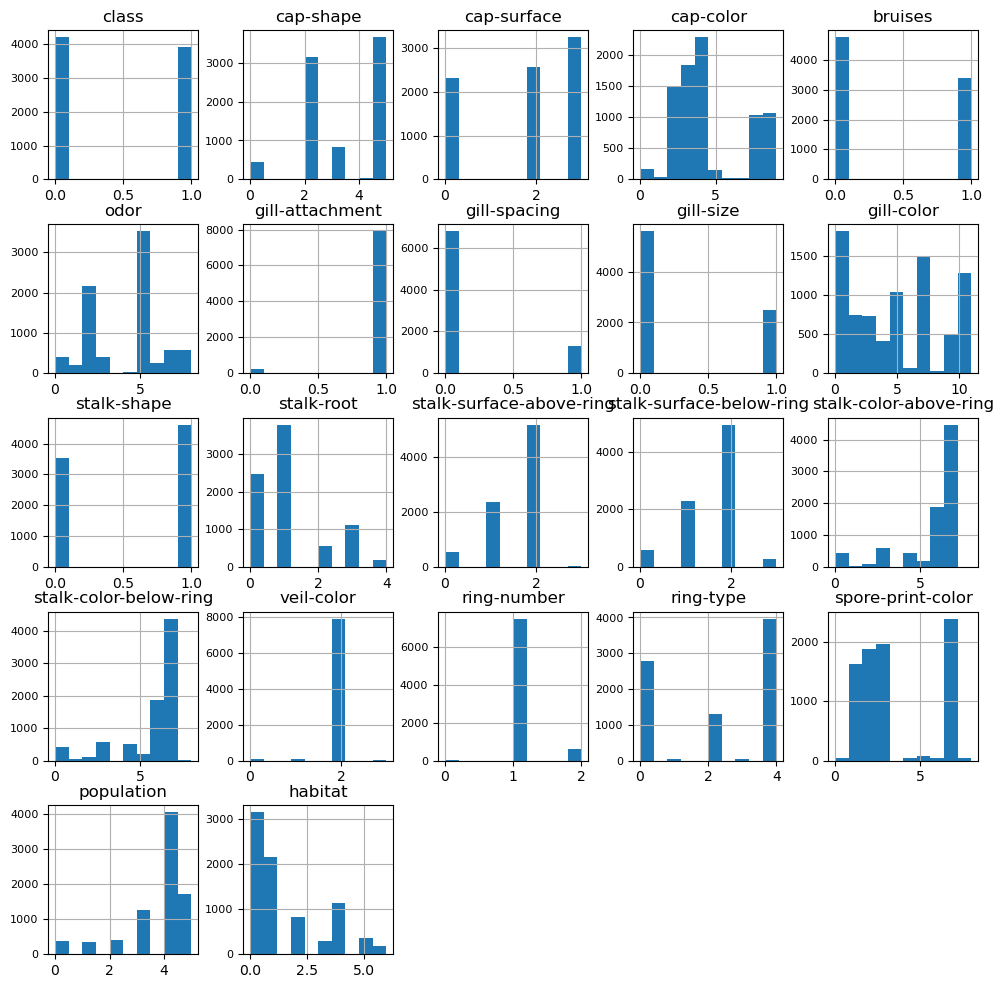

In [8]:
data.hist(figsize=[12, 12], ylabelsize=8, )


Como se puede observar en los histogramas, todos los atributos son categoricos como se dijo anteriormente.

Ahora podemos mostrar la relación entre los atributos.

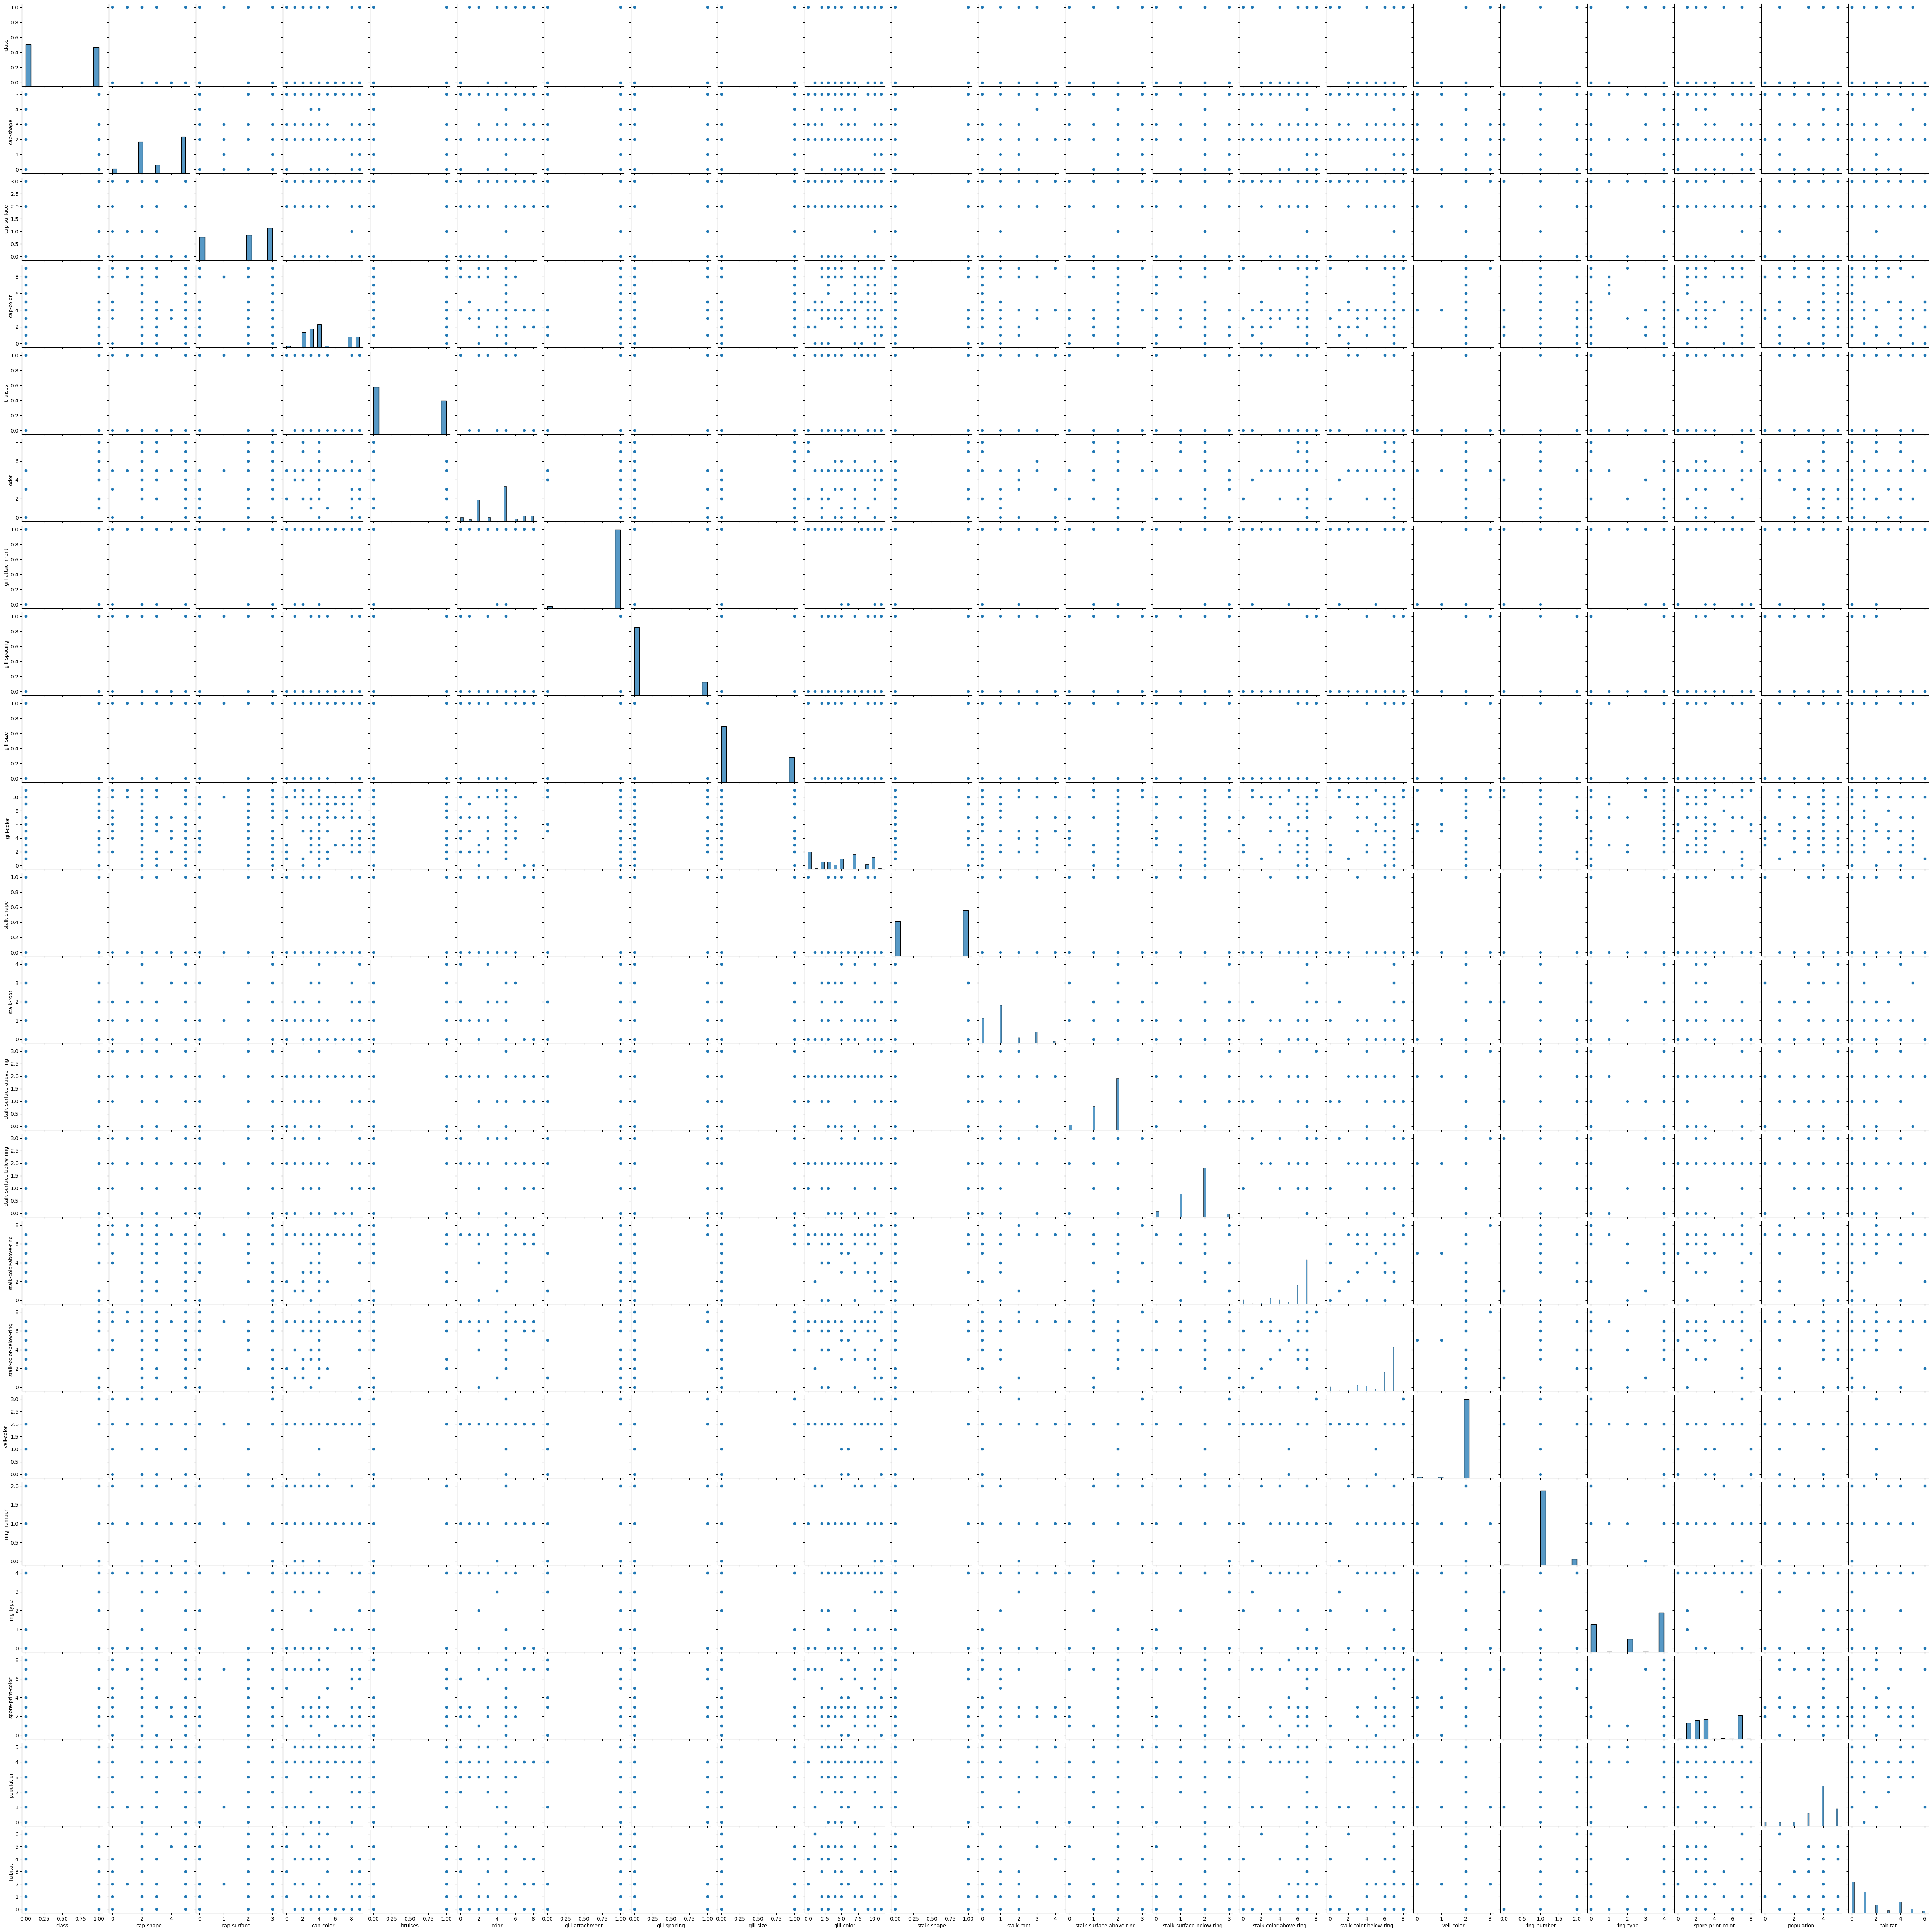

In [9]:
relacio = sns.pairplot(data)

Seleccionamos nuestra variable objetiva.

In [10]:
data_values = data.values
x = data_values[:, 1:]
y = data_values[:, 0]

Hacemos la división entre train y test.

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

Realizamos un *Standard Scaler* a nuestros datos.


**La ejecución con los datos sin escalar se ha realizado en este notebook, pero como se obtiene un accuracy menor, se ha decidido escalar los datos.**

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

Aplicamos una *PCA* para dividir nuestros datos en 2 componentes.

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

print("x_train_pca len: ", len(x_train_pca))
print("x_train_pca shape: ", x_train_pca.shape)

x_train_pca len:  5686
x_train_pca shape:  (5686, 2)


Creamos funciones para representar los resultados del train y test

Ademas realizaremos *CrossValidation* para obtener un *Average Accuracy*.

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn import metrics
from itertools import cycle

def mostraResultatsTrain(model, x_train, y_train):
    print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train, model.predict(x_train))))
    print('Classification Report:\n{}\n'.format(classification_report(y_train, model.predict(x_train))))
    print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train, model.predict(x_train))))
    scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
    print('Average Accuracy:\t{0:.4f}\n'.format(scores.mean()))
          
def mostraResultatsTest(model, x_test, y_test):
    print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test, model.predict(x_test))))
    print('Classification Report:\n{}\n'.format(classification_report(y_test, model.predict(x_test))))
    print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test, model.predict(x_test))))
    scores = cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy')
    print('Average Accuracy:\t{0:.4f}\n'.format(scores.mean()))

def rocCurve(y_act, y_pred, x):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw=2
    for i in range(x):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_act, y_pred[i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green', 'yellow', 'purple'])
    for i, color in zip(range(x), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of model {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('MultiClass ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

## Modelos

Los modelos que comprobaremos seran: 
- Decision Tree Classifier
- Logistic Regression
- SVM
- KNN
- Random Forest

**Todos los modelos han sido testeados con gridsearchCV para encontrar los mejores hiperparametros en cada caso.**

No muestro las ejecuciones de cada modelo porque tarda bastante tiempo en cada modelo, entonces para hacer más ágil el notebook he decidido ejecutar gridsearchCV, añadir los mejores hiperparametros a cada modelo y quitar la funcion gridsearchCV. Se puede observar que en cada modelo tiene hiperparametros diferentes entre ellos.

A continuación, mostrare un ejemplo de esta función con el Decision Tree Classifier sin PCA.

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_features' : ['auto', 'sqrt', 'log2'],
    'ccp_alpha' : [0.1, 0.01, 0.001],
    'max_depth' : [5, 6, 7, 8, 9],
    'criterion' : ['gini', 'entropy']
}

model = DecisionTreeClassifier(random_state = 42)
gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
gs.fit(x_train, y_train)

print(gs.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=42)


Gracias a la última instrucción, *best_estimator_*, se puede observar cuales són los mejores hiperparametros con este modelo.
Después de observar estos hiperparametros, los añado al modelo y realizamos el entreno y el testeo del modelo con estos hiperparametros.

### Decision Tree Classifier

##### Sin PCA

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


model_dtc = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9, max_features='auto', random_state=42)
model_dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=42)

In [17]:
print("Training results: ")
print()
mostraResultatsTrain(model_dtc, x_train, y_train)


print("Test results: ")
print()
mostraResultatsTest(model_dtc, x_test, y_test)

Training results: 

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	1.0000

Test results: 

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Confusion Matrix:
[[1257    0]
 [   0 1181]]

Average Accuracy:	0.9992



##### Con PCA

In [18]:
model_dtc = DecisionTreeClassifier(ccp_alpha=0.001, criterion='gini', max_depth=7, max_features='auto', random_state=42)
model_dtc.fit(x_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=7, max_features='auto',
                       random_state=42)

In [19]:
print("Training results: ")
print()
mostraResultatsTrain(model_dtc, x_train_pca, y_train)


print("Test results: ")
print()
mostraResultatsTest(model_dtc, x_test_pca, y_test)

Training results: 

Accuracy Score: 0.9383

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2951
           1       0.95      0.92      0.93      2735

    accuracy                           0.94      5686
   macro avg       0.94      0.94      0.94      5686
weighted avg       0.94      0.94      0.94      5686


Confusion Matrix:
[[2828  123]
 [ 228 2507]]

Average Accuracy:	0.9318

Test results: 

Accuracy Score: 0.9274

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1257
           1       0.94      0.91      0.92      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438


Confusion Matrix:
[[1192   65]
 [ 112 1069]]

Average Accuracy:	0.9298



### Logistic Regression

##### Sin PCA

In [20]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(C=1000, penalty= 'l2')
model_lr.fit(x_train, y_train)

LogisticRegression(C=1000)

In [21]:
print("Training results: ")
print()
mostraResultatsTrain(model_lr, x_train, y_train)


print("Test results: ")
print()
mostraResultatsTest(model_lr, x_test, y_test)

Training results: 

Accuracy Score: 0.9620

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2951
           1       0.96      0.96      0.96      2735

    accuracy                           0.96      5686
   macro avg       0.96      0.96      0.96      5686
weighted avg       0.96      0.96      0.96      5686


Confusion Matrix:
[[2839  112]
 [ 104 2631]]

Average Accuracy:	0.9604

Test results: 

Accuracy Score: 0.9627

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1257
           1       0.96      0.96      0.96      1181

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438


Confusion Matrix:
[[1211   46]
 [  45 1136]]

Average Accuracy:	0.9779



##### Con PCA

In [22]:
model_lr = LogisticRegression(C=0.1, penalty= 'l2')

model_lr.fit(x_train_pca, y_train)

LogisticRegression(C=0.1)

In [23]:
print("Training results: ")
print()
mostraResultatsTrain(model_lr, x_train_pca, y_train)


print("Test results: ")
print()
mostraResultatsTest(model_lr, x_test_pca, y_test)

Training results: 

Accuracy Score: 0.6760

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.71      0.70      2951
           1       0.67      0.64      0.65      2735

    accuracy                           0.68      5686
   macro avg       0.68      0.67      0.67      5686
weighted avg       0.68      0.68      0.68      5686


Confusion Matrix:
[[2103  848]
 [ 994 1741]]

Average Accuracy:	0.6755

Test results: 

Accuracy Score: 0.6715

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1257
           1       0.67      0.63      0.65      1181

    accuracy                           0.67      2438
   macro avg       0.67      0.67      0.67      2438
weighted avg       0.67      0.67      0.67      2438


Confusion Matrix:
[[891 366]
 [435 746]]

Average Accuracy:	0.6542



### Support Vector Machine (SVM)

##### Sin PCA

In [24]:
from sklearn.svm import SVC

model_svm = SVC(C=0.75, decision_function_shape="ovo", gamma=1, kernel="rbf", random_state=42)
model_svm.fit(x_train, y_train)

SVC(C=0.75, decision_function_shape='ovo', gamma=1, random_state=42)

In [25]:
print("Training results: ")
print()
mostraResultatsTrain(model_svm, x_train, y_train)


print("Test results: ")
print()
mostraResultatsTest(model_svm, x_test, y_test)

Training results: 

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	0.9995

Test results: 

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Confusion Matrix:
[[1257    0]
 [   0 1181]]

Average Accuracy:	0.9963



##### Con PCA

In [26]:
model_svm = SVC(C=2, decision_function_shape="ovo", gamma=1, kernel="rbf", random_state=42)
model_svm.fit(x_train_pca, y_train)

SVC(C=2, decision_function_shape='ovo', gamma=1, random_state=42)

In [27]:
print("Training results: ")
print()
mostraResultatsTrain(model_svm, x_train_pca, y_train)


print("Test results: ")
print()
mostraResultatsTest(model_svm, x_test_pca, y_test)

Training results: 

Accuracy Score: 0.9458

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2951
           1       0.97      0.92      0.94      2735

    accuracy                           0.95      5686
   macro avg       0.95      0.94      0.95      5686
weighted avg       0.95      0.95      0.95      5686


Confusion Matrix:
[[2861   90]
 [ 218 2517]]

Average Accuracy:	0.9453

Test results: 

Accuracy Score: 0.9422

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1257
           1       0.96      0.92      0.94      1181

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438


Confusion Matrix:
[[1215   42]
 [  99 1082]]

Average Accuracy:	0.9430



### K-Nearest Neighbours (KNN)

##### Sin PCA

In [28]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model_knn = KNN(metric='euclidean', n_neighbors=3, weights='uniform')
model_knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [29]:
print("Training results: ")
print()
mostraResultatsTrain(model_knn, x_train, y_train)


print("Test results: ")
print()
mostraResultatsTest(model_knn, x_test, y_test)

Training results: 

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	0.9996

Test results: 

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Confusion Matrix:
[[1257    0]
 [   0 1181]]

Average Accuracy:	0.9996



##### Con PCA

In [30]:
model_knn = KNN(metric='manhattan', n_neighbors=11, weights='distance')
model_knn.fit(x_train_pca, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [31]:
print("Training results: ")
print()
mostraResultatsTrain(model_knn, x_train_pca, y_train)


print("Test results: ")
print()
mostraResultatsTest(model_knn, x_test_pca, y_test)

Training results: 

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	0.9478

Test results: 

Accuracy Score: 0.9454

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1257
           1       0.96      0.93      0.94      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.94      0.95      2438
weighted avg       0.95      0.95      0.95      2438


Confusion Matrix:
[[1210   47]
 [  86 1095]]

Average Accuracy:	0.9356



### Random Forest

##### Sin PCA

In [32]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_depth=8, max_features='auto', random_state = 42)
model_rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=200,
                       random_state=42)

In [33]:
print("Training results: ")
print()
mostraResultatsTrain(model_rfc, x_train, y_train)


print("Test results: ")
print()
mostraResultatsTest(model_rfc, x_test, y_test)

Training results: 

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	1.0000

Test results: 

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Confusion Matrix:
[[1257    0]
 [   0 1181]]

Average Accuracy:	0.9996



##### Con PCA

In [34]:
model_rfc = RandomForestClassifier(n_estimators = 500, criterion = 'gini', max_depth=8, max_features='auto', random_state = 42)
model_rfc.fit(x_train_pca, y_train)

RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=500,
                       random_state=42)

In [35]:
print("Training results: ")
print()
mostraResultatsTrain(model_rfc, x_train_pca, y_train)


print("Test results: ")
print()
mostraResultatsTest(model_rfc, x_test_pca, y_test)

Training results: 

Accuracy Score: 0.9581

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2951
           1       0.97      0.94      0.96      2735

    accuracy                           0.96      5686
   macro avg       0.96      0.96      0.96      5686
weighted avg       0.96      0.96      0.96      5686


Confusion Matrix:
[[2883   68]
 [ 170 2565]]

Average Accuracy:	0.9465

Test results: 

Accuracy Score: 0.9463

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1257
           1       0.96      0.93      0.94      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438


Confusion Matrix:
[[1212   45]
 [  86 1095]]

Average Accuracy:	0.9430



## Resultados

Se puede observar en la siguiente tabla de valor accuracy promedio calculado con CrossValidation, tanto train como test, que hacer la classificación con los datos sin realizar la PCA resulta en una mejor classificacion que con PCA. Aunque estos ultimos también tienen una accuracy bastante alta.

##### Sin PCA
|| Decision Tree | Logistic Regression | SVM | KNN | Random Forest |
|---|---|---|---|---|---|
|Accuracy score train | 100% | 96.04% | 99.95% | 99.96% | 100% |
|Accuracy score test | 99.92% | 97.79% | 99.63% | 99.96% | 99.96% |

##### Con PCA
|| Decision Tree | Logistic Regression | SVM | KNN | Random Forest |
|---|---|---|---|---|---|
|Accuracy score train | 93.18% | 67.55% | 94.53% | 94.78% | 94.65% |
|Accuracy score test | 92.98% | 65.42% | 94.30% | 93.56% | 94.30% |

**Si realizamos las pruebas sin escalar los datos, se consigue un accuracy entre un 5% y un 10% menos, es decir se obtiene un peor accuracy.**

**Por ejemplo: un Random Forest con PCA obtiene un train accuracy de 88.61% mientras que con los datos escalados se obtiene un 91.72%.**

La mayor diferencia entre un mismo modelo es en el *Logistic Regression*, donde se puede ver una caida bastante grande en el accuracy score. En el resto de modelos tienen un accuracy bastante similar.

Ahora visualizaremos la *ROC curve* del test sin PCA y con PCA. 

Sin PCA



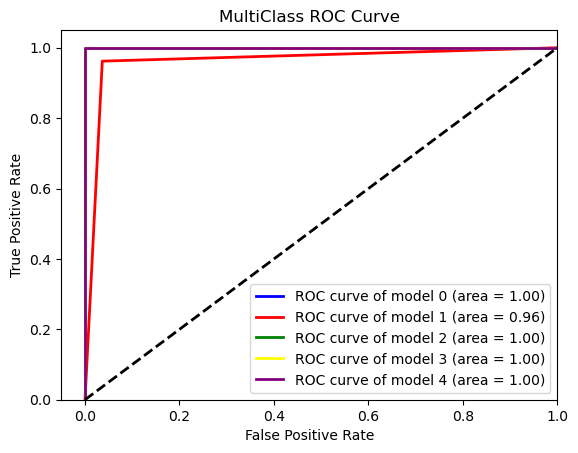

In [36]:
y_pred_sin = dict()

print("Sin PCA")
print()

# Decision Tree (0)
model_dtc = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9, max_features='auto', random_state=42)
model_dtc.fit(x_train, y_train)
y_pred_sin[0] = model_dtc.predict(x_test)

# Logistic Regression (1)
model_lr = LogisticRegression(C=1000, penalty= 'l2')
model_lr.fit(x_train, y_train)
y_pred_sin[1] = model_lr.predict(x_test)

# SVM (2)
model_svm = SVC(C=0.75, decision_function_shape="ovo", gamma=1, kernel="rbf", random_state=42)
model_svm.fit(x_train, y_train)
y_pred_sin[2] = model_svm.predict(x_test)

# KNN (3)
model_knn = KNN(metric='euclidean', n_neighbors=3, weights='uniform')
model_knn.fit(x_train,y_train)
y_pred_sin[3] = model_knn.predict(x_test)

# Random Forest (4)
model_rfc = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_depth=8, max_features='auto', random_state = 42)
model_rfc.fit(x_train, y_train)
y_pred_sin[4] = model_rfc.predict(x_test)

rocCurve(y_test, y_pred_sin, 5)

Con PCA



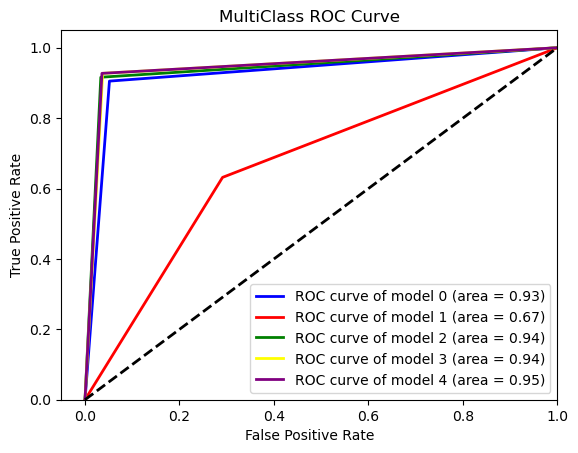

In [37]:
y_pred_con = dict()

print("Con PCA")
print()

# Decision Tree (0)
model_dtc = DecisionTreeClassifier(ccp_alpha=0.001, criterion='gini', max_depth=7, max_features='auto', random_state=42)
model_dtc.fit(x_train_pca, y_train)
y_pred_con[0] = model_dtc.predict(x_test_pca)

# Logistic Regression (1)
model_lr = LogisticRegression(C=0.1, penalty= 'l2')
model_lr.fit(x_train_pca, y_train)
y_pred_con[1] = model_lr.predict(x_test_pca)

# SVM (2)
model_svm = SVC(C=2, decision_function_shape="ovo", gamma=1, kernel="rbf", random_state=42)
model_svm.fit(x_train_pca, y_train)
y_pred_con[2] = model_svm.predict(x_test_pca)

# KNN (3)
model_knn = KNN(metric='manhattan', n_neighbors=11, weights='distance')
model_knn.fit(x_train_pca,y_train)
y_pred_con[3] = model_knn.predict(x_test_pca)

# Random Forest (4)
model_rfc = RandomForestClassifier(n_estimators = 500, criterion = 'gini', max_depth=8, max_features='auto', random_state = 42)
model_rfc.fit(x_train_pca, y_train)
y_pred_con[4] = model_rfc.predict(x_test_pca)

rocCurve(y_test, y_pred_con, 5)

Se puede observar como la majoria de modelos tienen un area mayor al 93%, salvo el *Logistic Regression* con PCA.

En conclusión, se puede decir que hemos obtenido varios modelos que podran classificar de manera correcta casi sin ningun error los proximos champiñones y no habra tanta gente que se lleve a la boca algun champiñon venenoso.